# Pima Indian Diabetes Prediction

Мета цього дослідження - проаналізувати медичні показники пацієнта, такі як рівень глюкози, артеріальний тиск, щільність шкіри, рівень інсуліну та багато інших, щоб спрогнозувати, чи є у пацієнта діабет чи ні.

### Що по даним?
Цей набір даних було створено вченими з Національного інституту діабету, захворювань органів травлення та нирок. Метою цього дослідження є діагностичне прогнозування наявності чи відсутності діабету у пацієнта на основі певних діагностичних вимірювань, включених до набору даних. На відбір цих випадків з більшої бази даних було накладено кілька обмежень. Зокрема, всі пацієнти тут - жінки віком не менше 21 року з індіанського племені піма.

Набор даних складаютється з декількох медичних змінних-предикторів (ознак) та однієї цільової змінної - результату. Змінні-предиктори включають кількість вагітностей пацієнтки, її ІМТ (індекс маси тіла), рівень інсуліну, вік тощо.

### Опис атрибутів (фічей)

| Feature | Description |
|---------|------------|
| Pregnancies | Number of times pregnant |
| Glucose | Plasma glucose concentration a 2 hours in an oral glucose tolerance test |
| BloodPressure | Diastolic blood pressure (mm Hg) |
| SkinThickness | Triceps skin fold thickness (mm) |
| Insulin | 2-Hour serum insulin (mu U/ml) |
| BMI | Body mass index (weight in kg/(height in m)^2) |
| DiabetesPedigreeFunction | Diabetes pedigree function |
| Age | Age (years) |
| Outcome | Class variable (0 or 1) |

# Завдання до лабораторної роботи:
- Завантажити вибірку `diabetes.csv`;
- Перевірити дані на нульові значення по атрибутам;
- Вивести описову статистику та подивитись розмірність даних;
- Провести попередній аналіз даних;
- Проаналізувати ознаки на зв'язки з цільовою змінною;
- Перевірити кореляцію змінних;
- Розділити дані на навчальну та тестову множини;
- Підібрати моделі та навчити обрані моделі;
- Налаштувати гіперпараметри;
- Провести аналіз результатів:
  - метрики оцінки якості;
  - побудувати звіти.
- Зробити висновки та обрати найкращу модель.

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from math import sqrt
import seaborn as sns
sns.set_theme(style="whitegrid")
sns.set(font_scale=1.5)

## EDA

### Load data

In [2]:
df = pd.read_csv('diabetes.csv')
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [3]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


### Statistics characteristics

In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df.shape

(768, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


For features `Glucose`, `BloodPressure`, `SkinThickness`, `Insulin` and `BMI` is 0. This is logically incorrect as these values cannot be 0. So, it means that it is missing values and we need to replace it with median.

In [7]:
median_glucose = df[df['Glucose'] != 0]['Glucose'].median()
df.loc[df['Glucose'] == 0, 'Glucose'] = median_glucose

In [8]:
median_blood = df[df['BloodPressure'] != 0]['BloodPressure'].median()
df.loc[df['BloodPressure'] == 0, 'BloodPressure'] = median_blood

In [9]:
median_skin = df[df['SkinThickness'] != 0]['SkinThickness'].median()
df.loc[df['SkinThickness'] == 0, 'SkinThickness'] = median_skin

In [10]:
median_insulin = df[df['Insulin'] != 0]['Insulin'].median()
df.loc[df['Insulin'] == 0, 'Insulin'] = median_insulin

In [11]:
median_BMI = df[df['BMI'] != 0]['BMI'].median()
df.loc[df['BMI'] == 0, 'BMI'] = median_BMI

### Check dupcicates

In [12]:
df.loc[df.duplicated()]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


So we havn't duplicates

### Check data

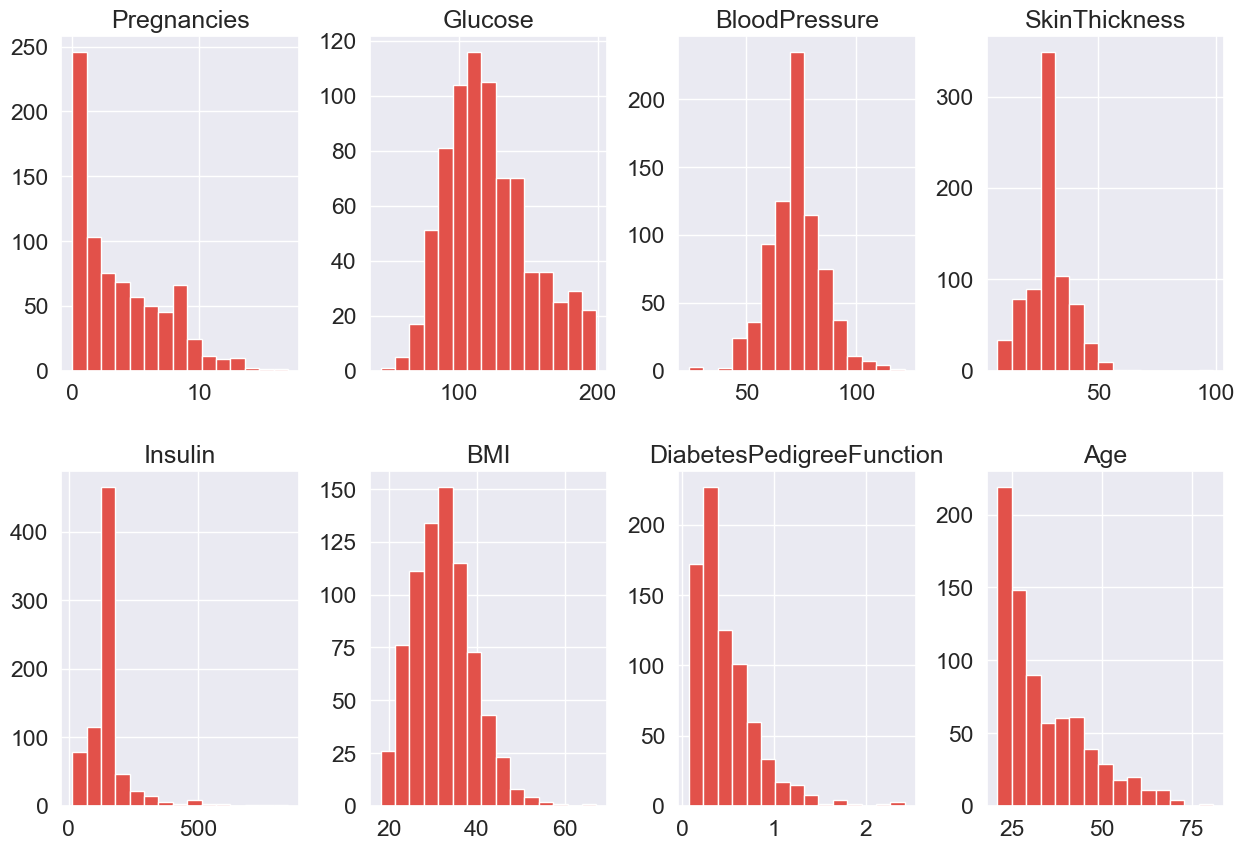

In [13]:
pal = sns.color_palette("Spectral")
sns.set_palette(pal)
numerical = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
df[numerical].hist(bins=15, figsize=(15, 10), layout=(2, 4));

The distribution for BMI, BloodPressure and SkinThikness in normal
For other is skewed

### Correlation matrix

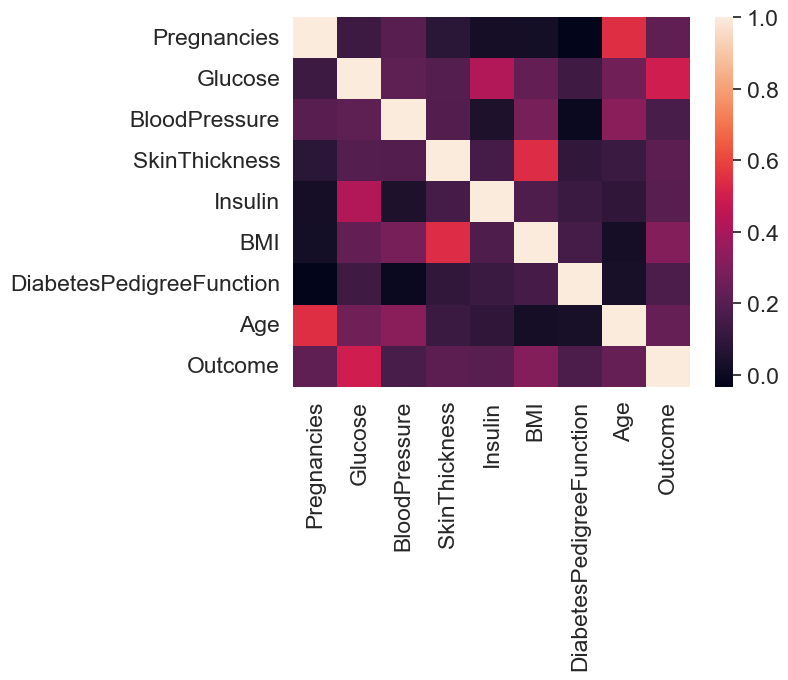

In [14]:
corr = df.corr()
sns.heatmap(corr)
plt.yticks(rotation=0)
plt.show()

So, we can see that the most correlation is between 'Age' and 'Outcome'

### Relation between each feature and the outcome variable by barplot

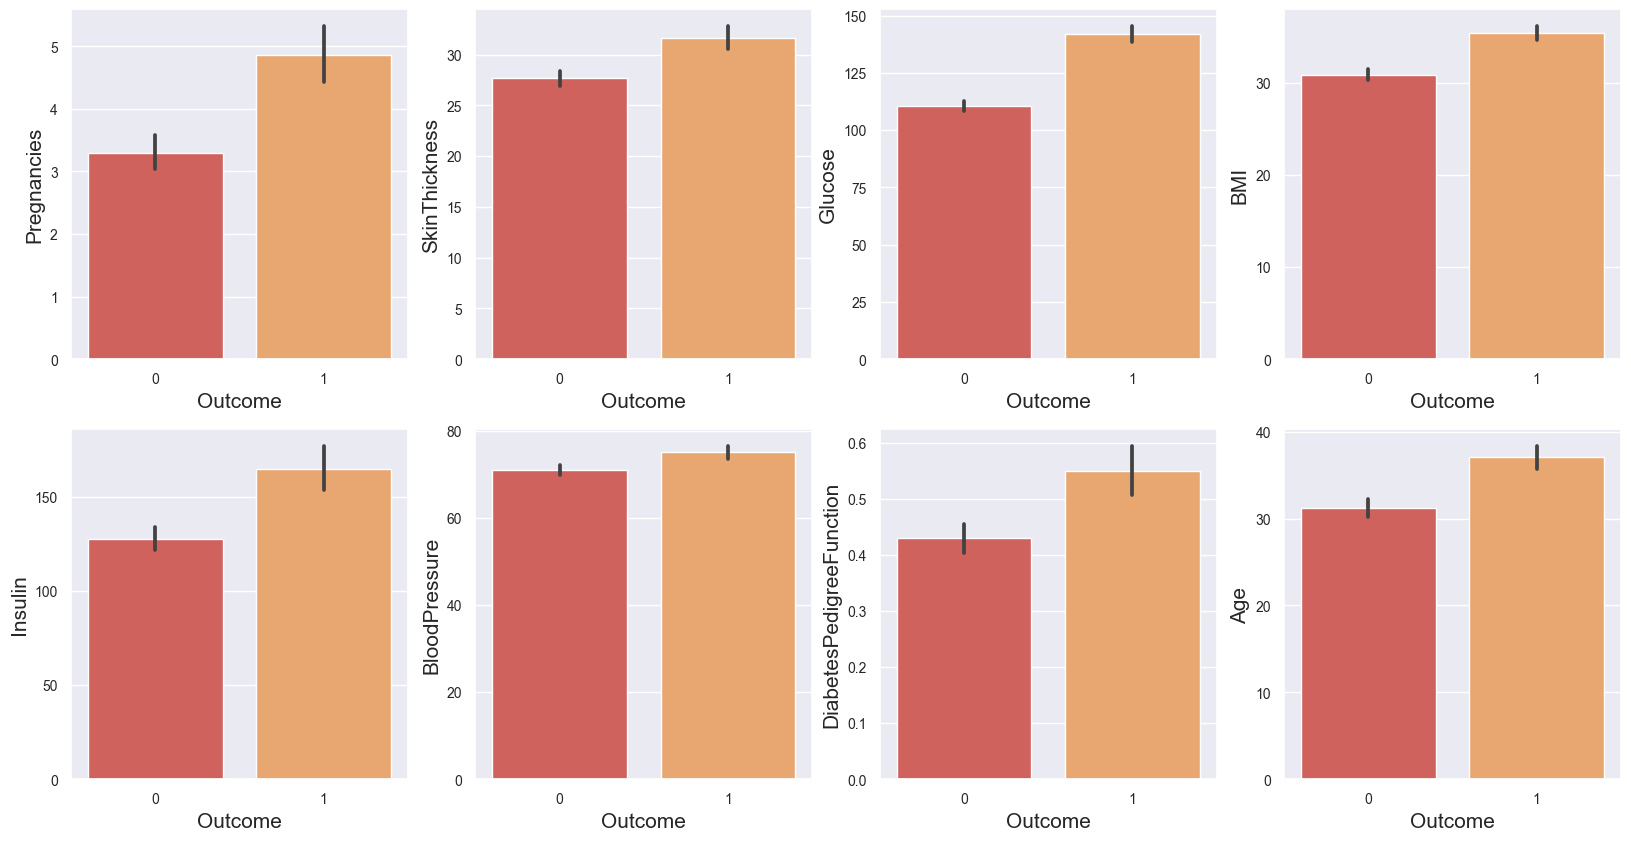

In [15]:
plt.figure(figsize=(20,10))
for i,col in enumerate(set(df.columns)-{'Outcome'}):
    plt.subplot(2,4,i+1)
    sns.barplot(data=df,x='Outcome',y=col,)
    plt.xlabel('Outcome', fontsize=15)
    plt.xticks(fontsize=10)
    plt.ylabel(col,fontsize=15)
    plt.yticks(fontsize=10)

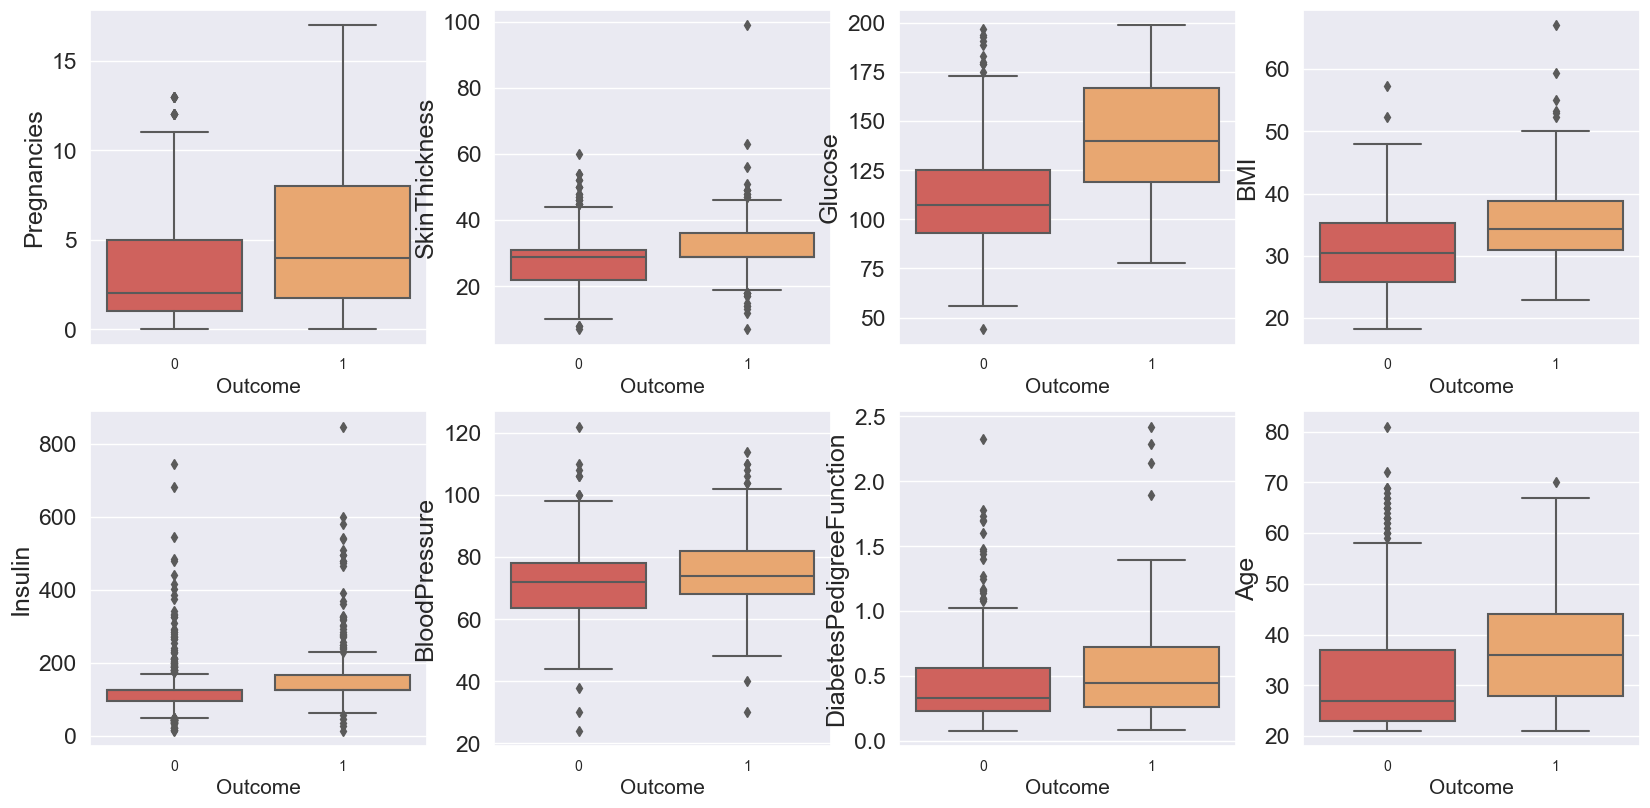

In [16]:
plt.figure(figsize=(20,20))
for i,col in enumerate(set(df.columns)-{'Outcome'}):
    plt.subplot(4,4,i+1)
    sns.boxplot(data=df,x='Outcome', y=col )
    plt.xlabel('Outcome', fontsize=15)
    plt.xticks(fontsize=10)

### Pairplot

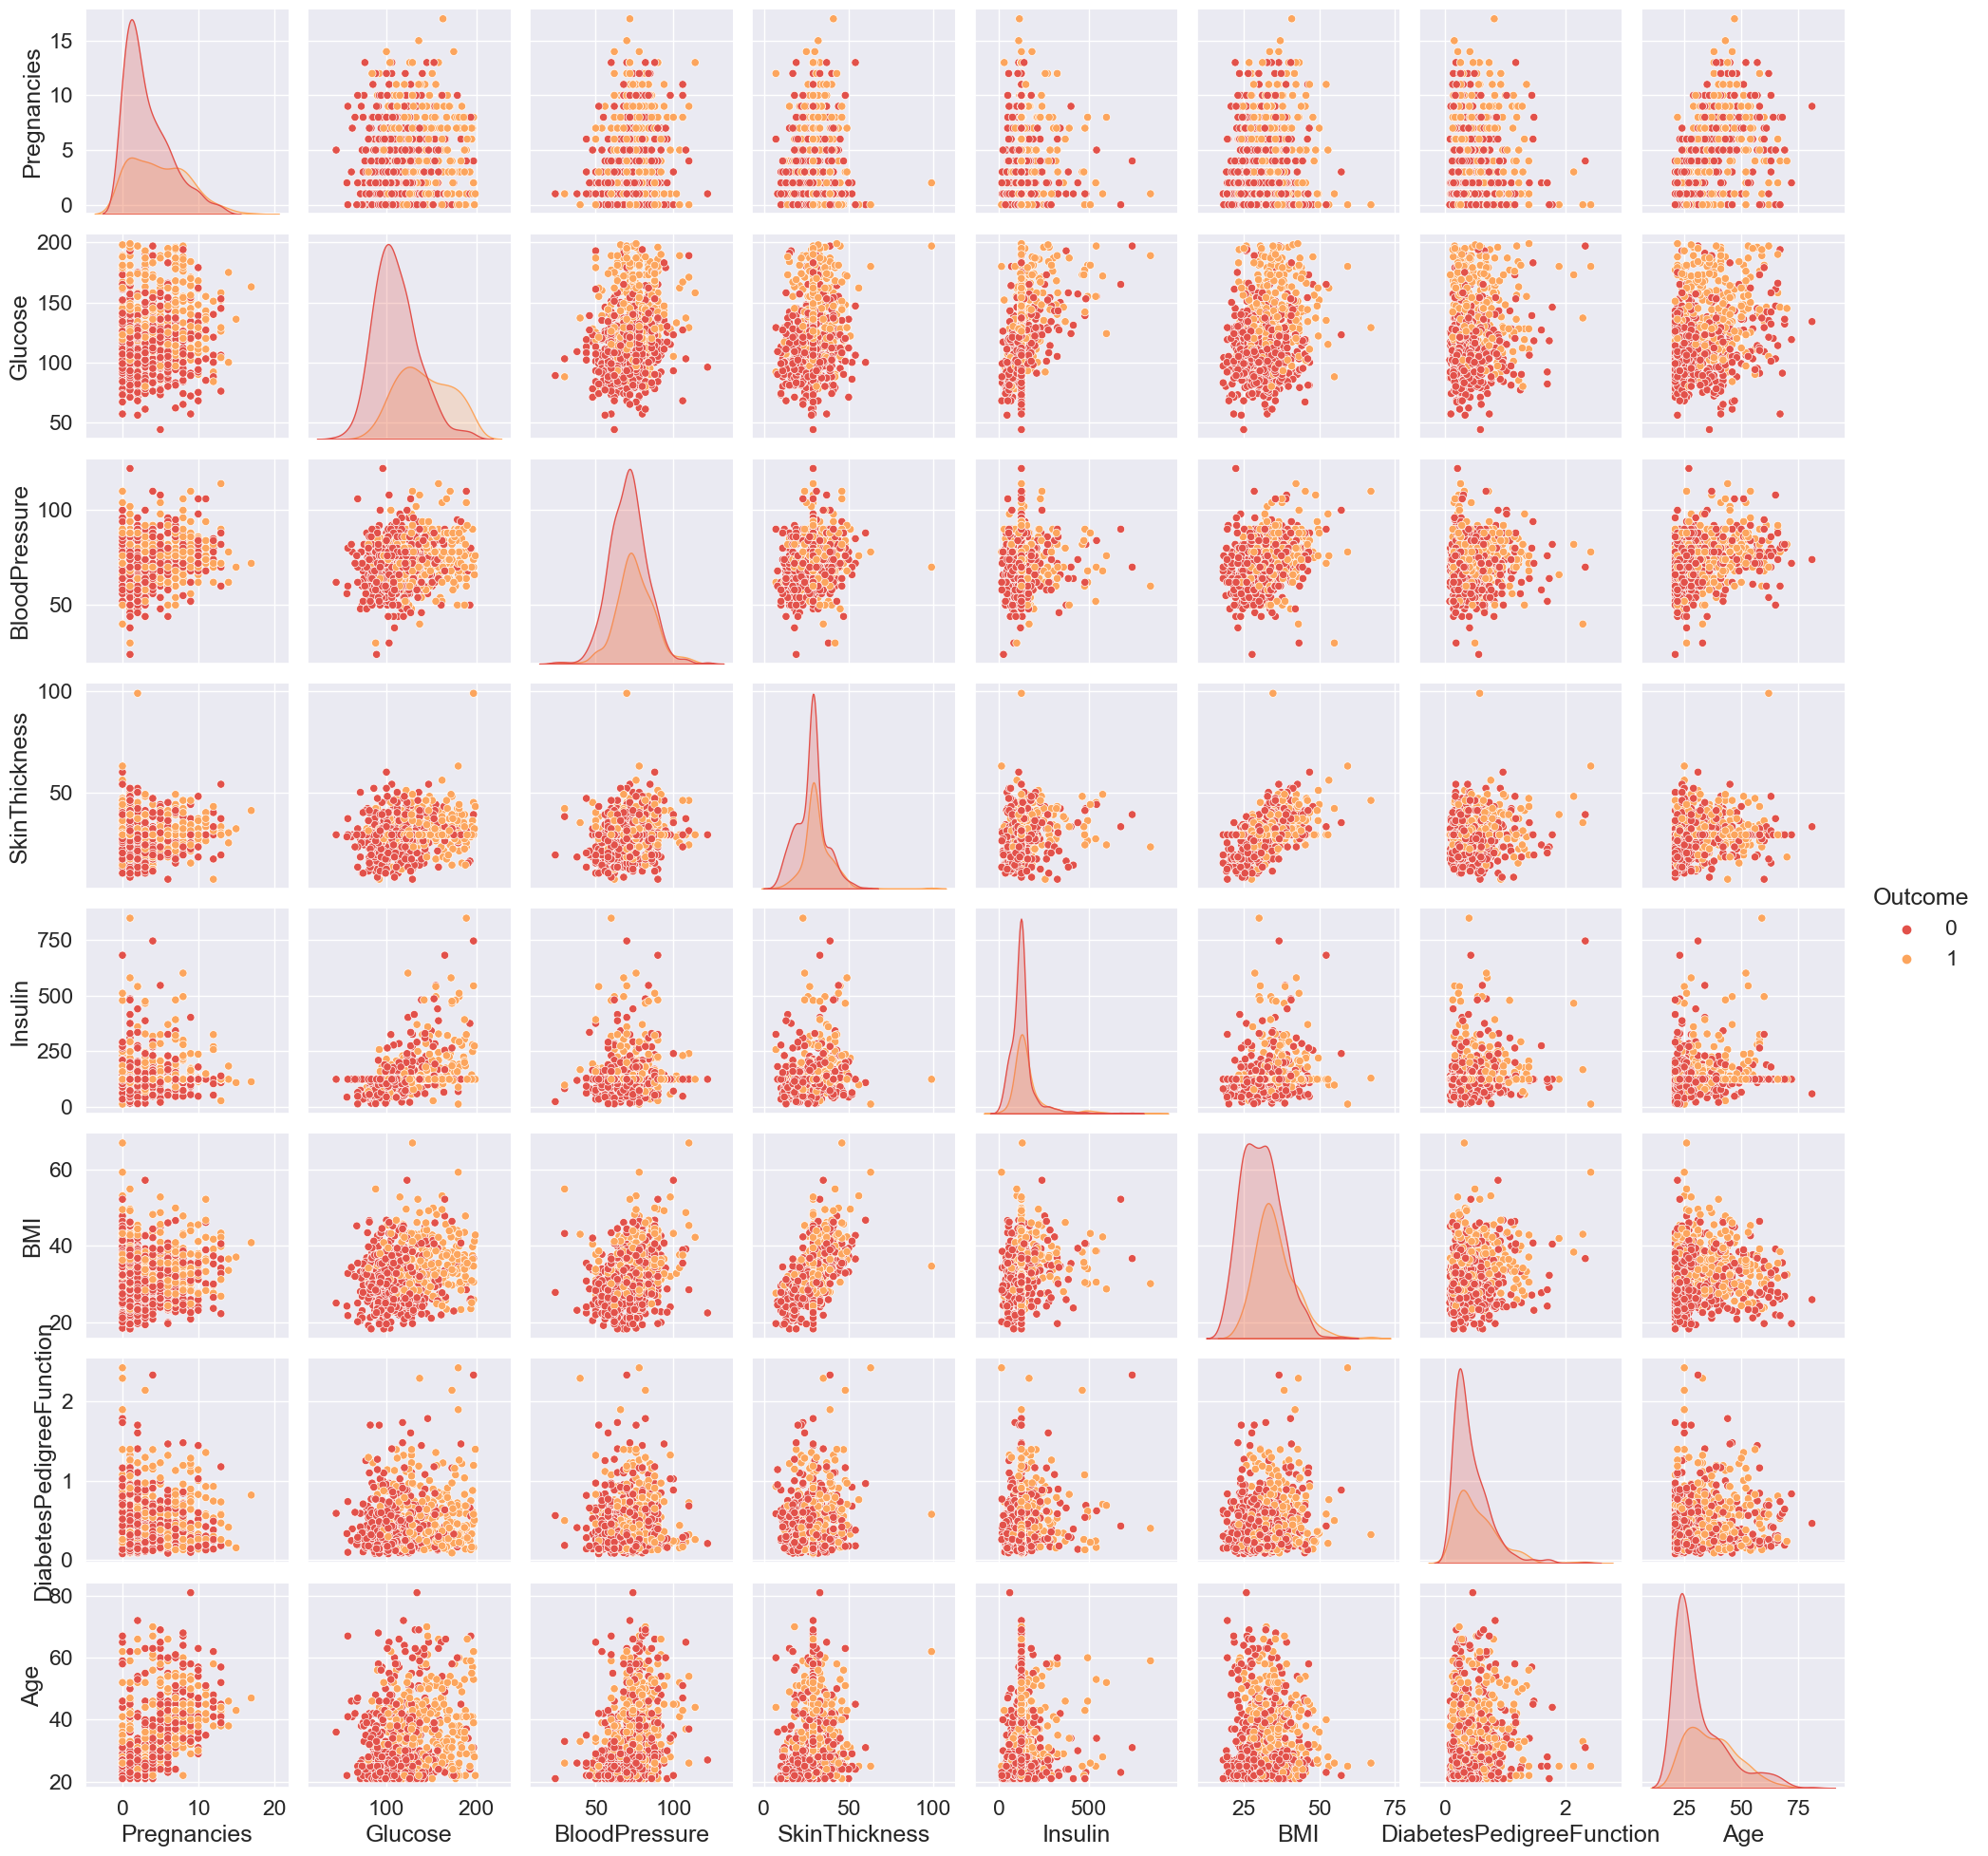

In [17]:
pal = sns.color_palette("Spectral")
sns.set_palette(pal)
sns.pairplot(data=df,hue='Outcome',diag_kind='kde')
plt.show()

### check target 

<AxesSubplot: xlabel='Outcome', ylabel='count'>

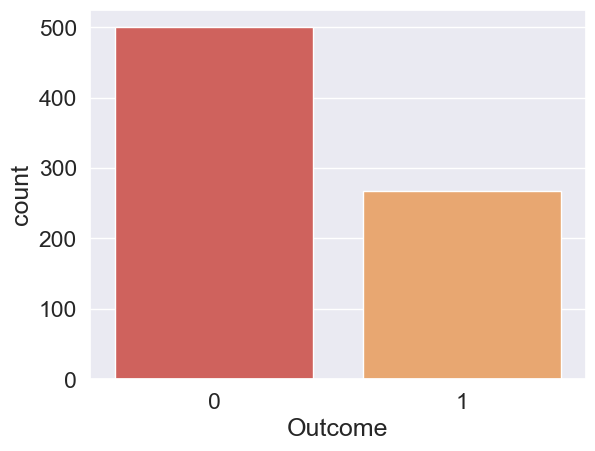

In [18]:
sns.countplot(x = 'Outcome', data=df)

## Data Normalization

In [19]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(df.drop(["Outcome"],axis = 1),),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [20]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.866045,-0.031990,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.205066,-0.528319,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.016662,-0.693761,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.073567,-0.528319,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.504422,-2.679076,0.670643,0.316566,1.549303,5.484909,-0.020496


## Splitting data

In [21]:
y = df['Outcome']
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0, stratify=y)

## First model - KNN

In [23]:
knn = KNeighborsClassifier(3)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [24]:
pred = knn.predict(X_test)

In [25]:
knn.score(X_train,y_train)

0.8424124513618677

In [26]:
knn.score(X_test,y_test)

0.7007874015748031

### Fine tuning

In [27]:
train_scores = []
test_scores = []

for i in range(1,50):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [28]:
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


In [29]:
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 77.16535433070865 % and k = [36]


So, on train data we have the best result with k=1 and on test data the best result is with k=36

### Ploting the results

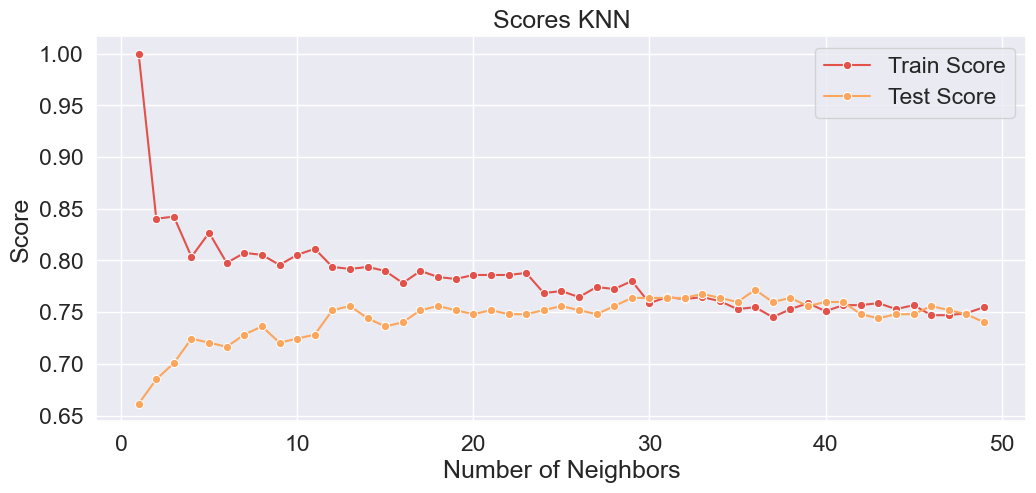

In [30]:

plt.figure(figsize=(12,5))
p = sns.lineplot(x= range(1,50), y =train_scores, marker='o', label='Train Score')
p = sns.lineplot(x= range(1,50), y =test_scores, marker='o', label='Test Score')
p.set(title = 'Scores KNN', xlabel = 'Number of Neighbors', ylabel = 'Score')
plt.show()


### The best model

In [31]:
knn = KNeighborsClassifier(36)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=36)

In [32]:
knn.score(X_test,y_test)

0.7716535433070866

### Confusion matrix

In [33]:
predicted = knn.predict(X_test)

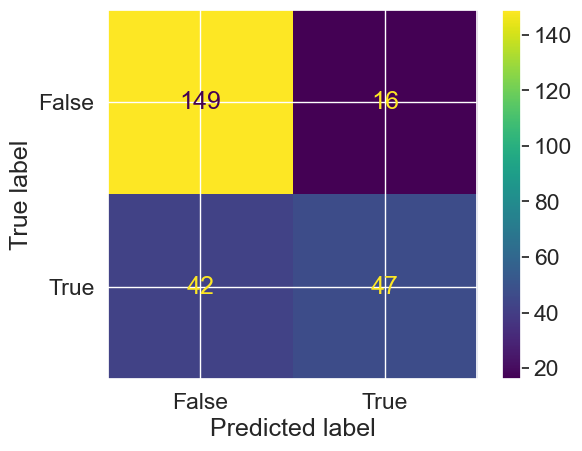

In [72]:
confusion_matrix = metrics.confusion_matrix(y_test, predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()

### Classification Report
TP – True Positives
    FP – False Positives

    Precision – Accuracy of positive predictions.
    Precision = TP/(TP + FP)

FN – False Negatives

    Recall(sensitivity or true positive rate): Fraction of positives that were correctly identified.
    Recall = TP/(TP+FN)
    
    
 F1 Score (aka F-Score or F-Measure) – A helpful metric for comparing two classifiers.
    F1 Score takes into account precision and the recall. 
    It is created by finding the the harmonic mean of precision and recall.

    F1 = 2 x (precision x recall)/(precision + recall)


In [35]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.78      0.90      0.84       165
           1       0.75      0.53      0.62        89

    accuracy                           0.77       254
   macro avg       0.76      0.72      0.73       254
weighted avg       0.77      0.77      0.76       254



Conclusion for KNN: our model work pretty good

### Hyper Parameter optimization

In [36]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors':np.arange(1,100)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.7721840251252015
Best Parameters: {'n_neighbors': 25}


## Second Model - SVM

In [78]:
from sklearn import svm
support_vector_classifier = svm.SVC(kernel="linear",).fit(X_train,y_train)
y_pred = support_vector_classifier.predict(X_test)
cm = metrics.confusion_matrix(y_test,y_pred)
print("Our Accuracy is: ", (cm[0][0]+cm[1][1])/(cm[0][0]+cm[1][1]+cm[0][1]+cm[1][0]))
print(accuracy_score(y_test,y_pred))

Our Accuracy is:  0.7480314960629921
0.7480314960629921


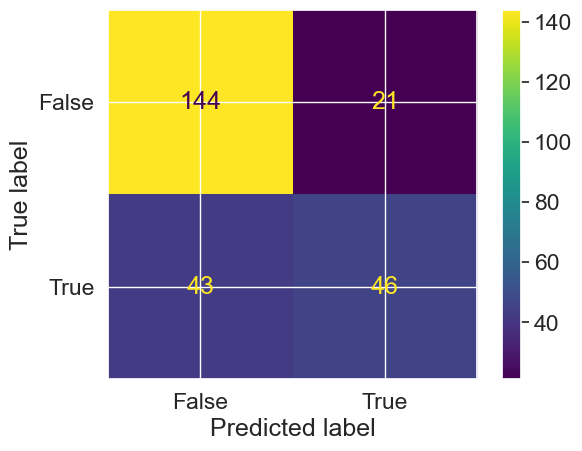

In [79]:
cm_d = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
cm_d.plot()

### Classification Report

In [83]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.87      0.82       165
           1       0.69      0.52      0.59        89

    accuracy                           0.75       254
   macro avg       0.73      0.69      0.70       254
weighted avg       0.74      0.75      0.74       254



In [84]:
y_trainpred = support_vector_classifier.predict(X_train)
print("The mean squared error of train is:",mean_squared_error(y_train,y_trainpred))

The mean squared error of train is: 0.21595330739299612


In [85]:
print("The mean squared error of test is:",mean_squared_error(y_test,y_pred))

The mean squared error of test is: 0.25196850393700787


In [86]:
svm_params ={"C":np.arange(1,20)}
svms = svm.SVC(kernel="linear")
svm_cv = GridSearchCV(svms,svm_params,cv=8)
svm_cv.fit(X_train,y_train)
print(svm_cv.best_score_)
print(svm_cv.best_params_)

0.7645432692307692
{'C': 2}


In [87]:
svm_tuned = svm.SVC(kernel="linear",C=2).fit(X_train,y_train)
y_pred2 = svm_tuned.predict(X_test)
cm2 = metrics.confusion_matrix(y_test,y_pred2)
print(cm2)
print(accuracy_score(y_test,y_pred2))

[[144  21]
 [ 43  46]]
0.7480314960629921


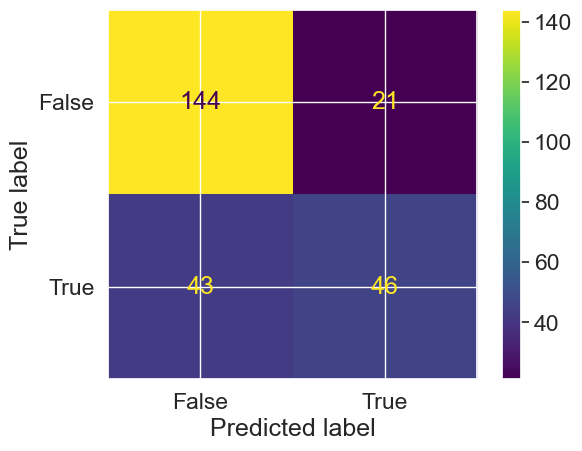

In [88]:
cm_dis = metrics.ConfusionMatrixDisplay(confusion_matrix = cm2, display_labels = [False, True])
cm_dis.plot()

In [89]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.77      0.87      0.82       165
           1       0.69      0.52      0.59        89

    accuracy                           0.75       254
   macro avg       0.73      0.69      0.70       254
weighted avg       0.74      0.75      0.74       254



## Third Model - LogisticRegression

In [65]:
LRmodel = LogisticRegression(random_state=0).fit(X_train,y_train)
LRy_pred = LRmodel.predict(X_test)
LRcm = metrics.confusion_matrix(y_test,LRy_pred)
print("Our Accuracy is: ", (LRcm[0][0]+LRcm[1][1])/(LRcm[0][0]+LRcm[1][1]+LRcm[0][1]+LRcm[1][0]))
print(accuracy_score(y_test,LRy_pred))

Our Accuracy is:  0.7480314960629921
0.7480314960629921


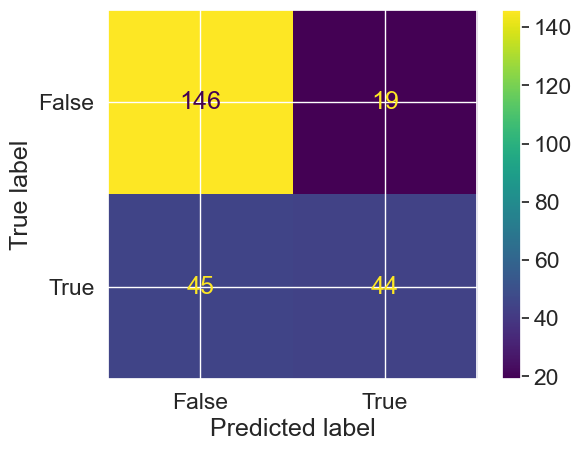

In [91]:
cm_d = metrics.ConfusionMatrixDisplay(confusion_matrix = LRcm, display_labels = [False, True])
cm_d.plot()

In [92]:
print(classification_report(y_test,LRy_pred))

              precision    recall  f1-score   support

           0       0.76      0.88      0.82       165
           1       0.70      0.49      0.58        89

    accuracy                           0.75       254
   macro avg       0.73      0.69      0.70       254
weighted avg       0.74      0.75      0.74       254



In [93]:
LR_params ={"C":np.arange(1,20)}
LRs = LogisticRegression(random_state=0)
LR_cv = GridSearchCV(LRs,LR_params,cv=8)
LR_cv.fit(X_train,y_train)
print(LR_cv.best_score_)
print(LR_cv.best_params_)

0.7645132211538461
{'C': 1}


In [98]:
LR_tuned = LogisticRegression(random_state=0,C=3).fit(X_train,y_train)
LRy_pred2 = LR_tuned.predict(X_test)
LRcm2 = metrics.confusion_matrix(y_test,LRy_pred2)
print(LRcm2)
print(accuracy_score(y_test,LRy_pred2))

[[146  19]
 [ 45  44]]
0.7480314960629921


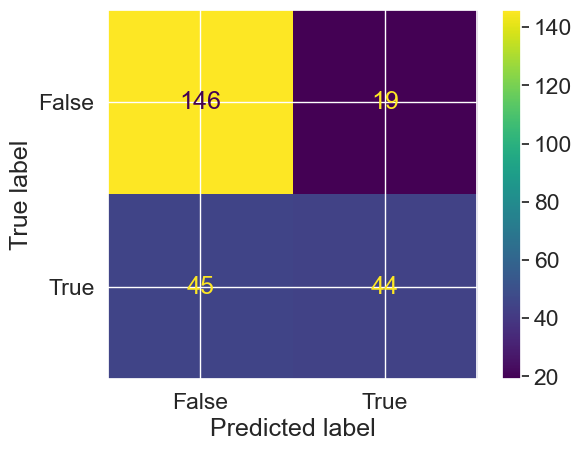

In [99]:
cm_displ = metrics.ConfusionMatrixDisplay(confusion_matrix = LRcm2, display_labels = [False, True])
cm_displ.plot()

In [100]:
print(classification_report(y_test,LRy_pred2))

              precision    recall  f1-score   support

           0       0.76      0.88      0.82       165
           1       0.70      0.49      0.58        89

    accuracy                           0.75       254
   macro avg       0.73      0.69      0.70       254
weighted avg       0.74      0.75      0.74       254

